# Fundamentals of Machine Learning (CSCI-UA.473)

## Lab 2: Regression, Loss Functions and Regularization

### Goal:  Demonstrate some other facets of Regression, different loss functions and Regularization methods.

In [1]:
# Let's import some packages we'll need.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import pandas as pd
matplotlib.__version__

'3.5.2'

In [2]:
# Load data:
data = np.genfromtxt('housingsata.csv', delimiter=',')
print(data.shape)

X, y = data[:,:4], data[:,4]

(2000, 5)


## Lets try understanding the least squares regression from a linear algebra (geometric) perspective

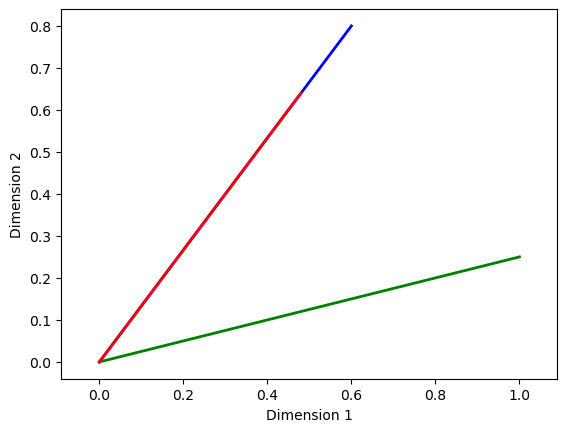

In [3]:
#Before we go into the details of this, recall the principles of vector projection from the lecture:
vec1 = np.array([1,0.25]) #Vector 1
vec2 = np.array([1.5,2]) #Vector 2
magVec1 = np.sqrt(vec1[0]**2 + vec1[1]**2) #Magnitude of vector 1
magVec2 = np.sqrt(vec2[0]**2 + vec2[1]**2) #Magnitude of vector 2 
dotProduct = np.dot(vec1,vec2)  # Using a function to get the dot product 
angleBetween = np.degrees(np.arccos(dotProduct/(magVec1*magVec2))) #What is the angle between the vectors?
uVec = vec2/magVec2 # Creating a unit vector out of vec2 by dividing by magnitude

p = magVec1 * np.cos(np.deg2rad(angleBetween)) # The projection direction
projVec = p * uVec # That's the actual projected vector, yielded by p multiplied with the unit vector
projVec = vec2 *np.dot(vec1, vec2)/np.dot(vec2, vec2)
plt.plot([0,vec1[0]],[0,vec1[1]],color='green',linewidth=2) # Plot vec1 in purple
plt.plot([0,uVec[0]],[0,uVec[1]],color='blue',linewidth=2) # Plot uVec in blue
plt.plot([0,projVec[0]],[0,projVec[1]],color='red',linewidth=2) # Plot the projection of vec1 onto vec2 in red
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.axis('equal'); #Make sure aspect ratio is the same

[2245. 2116. 3004.] [1435.1  1467.2    73.62]


/var/folders/7w/_s1d38tj1gg0r7nf9rbt0pzw0000gn/T/ipykernel_81815/2024499651.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # project into 3d space


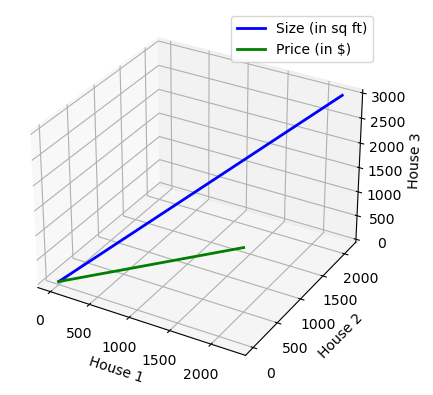

In [4]:
# Now lets use the geometric interpretation seen in the lectures to our housing dataset
# To make things easily visualised we will use only a subset of our dataset
X_sub = X[:3, 0]
y_sub = y[:3]/1e3

fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space

ax.plot3D([0,X_sub[0]],[0,X_sub[1]],[0,X_sub[2]],color='blue',linewidth=2) 
ax.plot3D([0,y_sub[0]],[0,y_sub[1]],[0,y_sub[2]],color='green',linewidth=2) 
plt.legend(['Size (in sq ft)','Price (in \$)']) 
ax.set_xlabel('House 1') 
ax.set_ylabel('House 2') 
ax.set_zlabel('House 3')
print(X_sub, y_sub)

[ 792.7756809   747.22197808 1060.80095565]
[ 792.7756809   747.22197808 1060.80095565]


/var/folders/7w/_s1d38tj1gg0r7nf9rbt0pzw0000gn/T/ipykernel_81815/2744950380.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # project into 3d space


Text(0.5, 0, 'House 3')

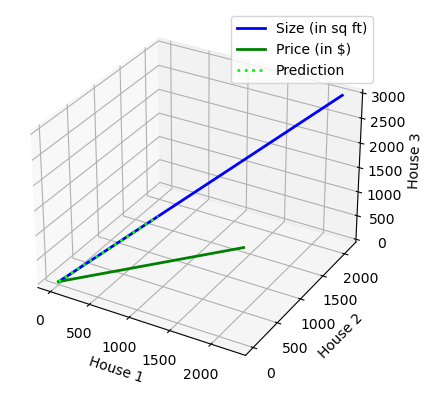

In [5]:
# beta = (X^T X)^(-1) * X^T *y
# Now, let's actually use the formula we derived
# We use the projection formula to find beta to minimize the distance
# between beta*input and output. Output = beta*input + error

beta = np.dot(y_sub,X_sub)/np.dot(X_sub,X_sub) # Find the beta
prediction = beta * X_sub # Make a prediction (simplest possible)
print(prediction)
model = LinearRegression().fit(X_sub.reshape(1,-1), y_sub.reshape(1,-1))
model.predict(X_sub.reshape(1,-1))
print(prediction)
# Add this to the plot - the plot thickens:
fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0,X_sub[0]],[0,X_sub[1]],[0,X_sub[2]],color='blue',linewidth=2) 
ax.plot3D([0,y_sub[0]],[0,y_sub[1]],[0,y_sub[2]],color='green',linewidth=2) 
ax.plot3D([0,prediction[0]],[0,prediction[1]],[0,prediction[2]],color='lime',linewidth=2,linestyle='dotted') 
plt.legend(['Size (in sq ft)','Price (in \$)','Prediction']) 
ax.set_xlabel('House 1') 
ax.set_ylabel('House 2') 
ax.set_zlabel('House 3') 

/var/folders/7w/_s1d38tj1gg0r7nf9rbt0pzw0000gn/T/ipykernel_81815/3057286017.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d') # project into 3d space


Text(0.5, 0, 'House 3')

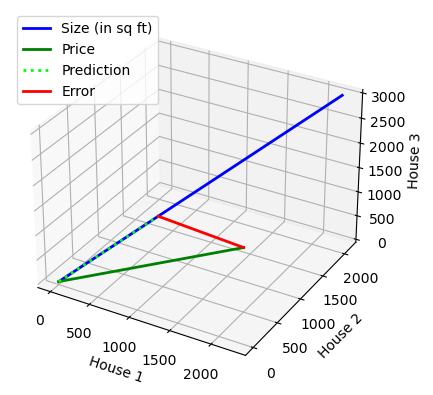

In [6]:
#%% Let's explicitly add the distance between the two (prediction and outcome)

fig = plt.figure() # init figure
ax = fig.gca(projection='3d') # project into 3d space
ax.plot3D([0, X_sub[0]],[0,X_sub[1]],[0,X_sub[2]],color='blue',linewidth=2) 
ax.plot3D([0,y_sub[0]],[0,y_sub[1]],[0,y_sub[2]],color='green',linewidth=2) 
ax.plot3D([0,prediction[0]],[0,prediction[1]],[0,prediction[2]],color='lime',linewidth=2,linestyle='dotted')
ax.plot3D([y_sub[0],prediction[0]],[y_sub[1],prediction[1]],[y_sub[2],prediction[2]],color='red',linewidth=2)  
plt.legend(['Size (in sq ft)','Price','Prediction','Error']) 
ax.set_xlabel('House 1') 
ax.set_ylabel('House 2') 
ax.set_zlabel('House 3') 

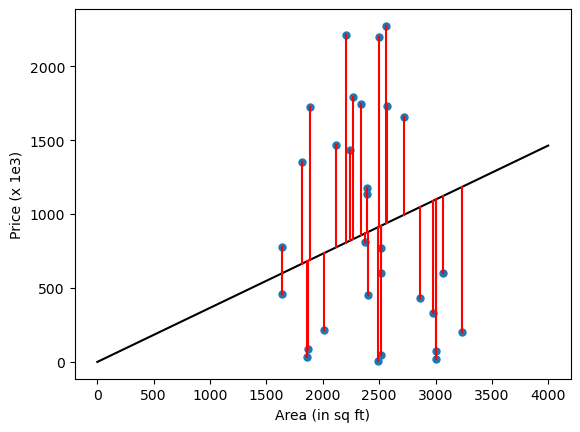

In [7]:
#%% Now that we convinced ourselves that this is in fact the correct beta (geometrically)
# we can go back and plot the solution
# We could open the old figure again, but let's start from scratch
# What if we had 30 houses?
maxArea = 4000
X_sub = X[:30, 0] 
y_sub = y[:30]/1e3
beta = np.dot(y_sub,X_sub)/np.dot(X_sub,X_sub) # Find the beta
prediction = beta * X_sub # Make a prediction (simplest possible)

regressionLineX = np.linspace(0,maxArea,10) # Gives us 10 equally spaced numbers between 0 and 4000. Intrapolation, x-base
regressionLineY = beta * regressionLineX # Find the ys of the regression line
plt.plot(X_sub,y_sub,'o',markersize=5) # Plot the data
plt.plot(regressionLineX,regressionLineY,color='black') # Plot regression line
plt.plot([X_sub,X_sub],[prediction,y_sub],color='red') # Residuals
plt.xlabel('Area (in sq ft)')
plt.ylabel('Price (x 1e3)')
plt.show()

## But least squares is not our only option...infact it is not always the best one either!

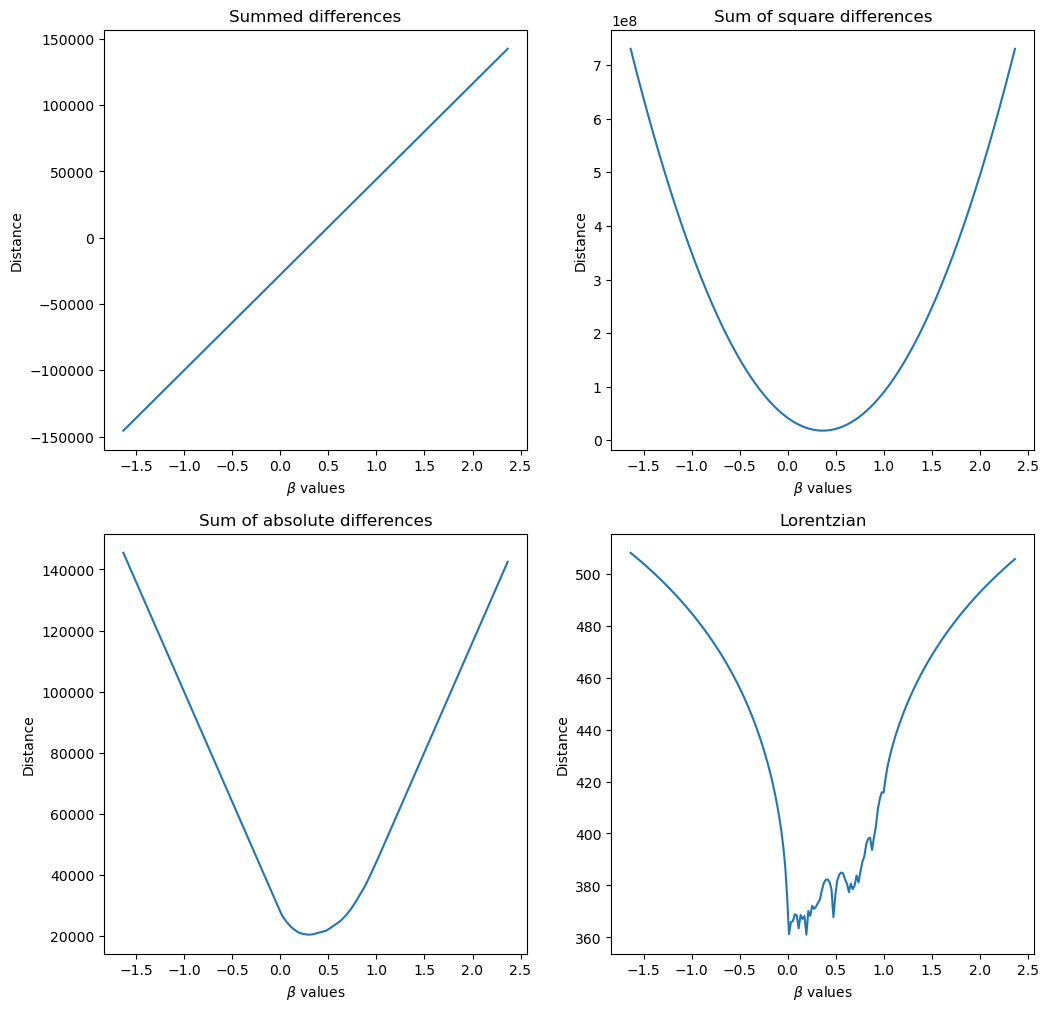

In [8]:
startExploration = beta - 2
endExploration = beta + 2
numBeta = 200
testBetas = np.linspace(startExploration,endExploration,numBeta)
distanceSum = np.empty([numBeta,4]) # Init container
distanceSum[:] = np.NaN # Convert to NaN

for ii in range(numBeta):
    prediction = testBetas[ii] * X_sub
    distanceSum[ii,0] = sum(prediction-y_sub) # Simple
    distanceSum[ii,1] = sum((prediction-y_sub)**2) # Sum of squares
    distanceSum[ii,2] = sum(abs(prediction-y_sub)) # Absolute value
    distanceSum[ii,3] = sum(np.log(1 + (prediction-y_sub)**2)) # Lorentzian

fig = plt.figure(figsize=(12,12))
for ii in range(int(np.size(distanceSum)/len(distanceSum))):
    ax = fig.add_subplot(2, 2, ii+1)
#     plt.subplot(2,2,ii+1)
    ax.plot(testBetas,distanceSum[:,ii])
    ax.set_xlabel(r"$\beta$ values")
    ax.set_ylabel("Distance")
    if ii == 0:
        ax.set_title('Summed differences')
    elif ii == 1:
        ax.set_title('Sum of square differences')
    elif ii == 2:
        ax.set_title('Sum of absolute differences')
    else:
        ax.set_title('Lorentzian')

## To see how least squares might be completely inappropriate for some situations consider the following synthetic data...

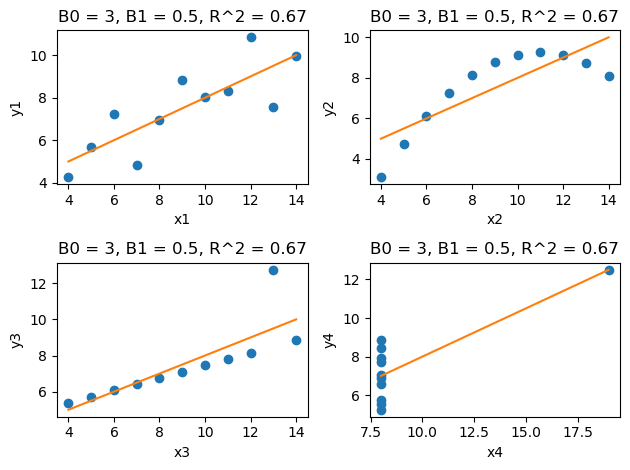

In [15]:
# Init data:
x1 = np.array([10,8,13,9,11,14,6,4,12,7,5])
x2 = np.copy(x1)
x3 = np.copy(x1)
x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
y1 = np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
y2 = np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
y3 = np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.5,5.56,7.91,6.89])

# Plot data:
plt.subplot(2,2,1)
plt.plot(x1,y1,'o')
model = LinearRegression().fit(x1.reshape(-1,1),y1.reshape(-1,1))
xVals = np.linspace(4,14,101)
regressLine = model.coef_ * xVals + model.intercept_
rSqr = model.score(x1.reshape(-1,1),y1.reshape(-1,1))
plt.plot(xVals,regressLine.flatten())
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('B0 = {:.0f}'.format(model.intercept_[0]) + ', B1 = {:.1f}'.format(model.coef_[0][0]) + ', R^2 = {:.2f}'.format(rSqr))
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot(x2,y2,'o')
model = LinearRegression().fit(x2.reshape(-1,1),y2.reshape(-1,1))
xVals = np.linspace(4,14,101)
regressLine = model.coef_ * xVals + model.intercept_
rSqr = model.score(x2.reshape(-1,1),y2.reshape(-1,1))
plt.plot(xVals,regressLine.flatten())
plt.xlabel('x2')
plt.ylabel('y2')
plt.title('B0 = {:.0f}'.format(model.intercept_[0]) + ', B1 = {:.1f}'.format(model.coef_[0][0]) + ', R^2 = {:.2f}'.format(0.67))
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(x3,y3,'o')
model = LinearRegression().fit(x3.reshape(-1,1),y3.reshape(-1,1))
xVals = np.linspace(4,14,101)
regressLine = model.coef_ * xVals + model.intercept_
rSqr = model.score(x3.reshape(-1,1),y3.reshape(-1,1))
plt.plot(xVals,regressLine.flatten())
plt.xlabel('x3')
plt.ylabel('y3')
plt.title('B0 = {:.0f}'.format(model.intercept_[0]) + ', B1 = {:.1f}'.format(model.coef_[0][0]) + ', R^2 = {:.2f}'.format(0.67))
plt.tight_layout()

plt.subplot(2,2,4)
plt.plot(x4,y4,'o')
model = LinearRegression().fit(x4.reshape(-1,1),y4.reshape(-1,1))
xVals = np.linspace(8,19,101)
regressLine = model.coef_ * xVals + model.intercept_
rSqr = model.score(x4.reshape(-1,1),y4.reshape(-1,1))
plt.plot(xVals,regressLine.flatten())
plt.xlabel('x4')
plt.ylabel('y4')
plt.title('B0 = {:.0f}'.format(model.intercept_[0]) + ', B1 = {:.1f}'.format(model.coef_[0][0]) + ', R^2 = {:.2f}'.format(0.67))
plt.tight_layout()

## Polynomial Regression and Overfitting

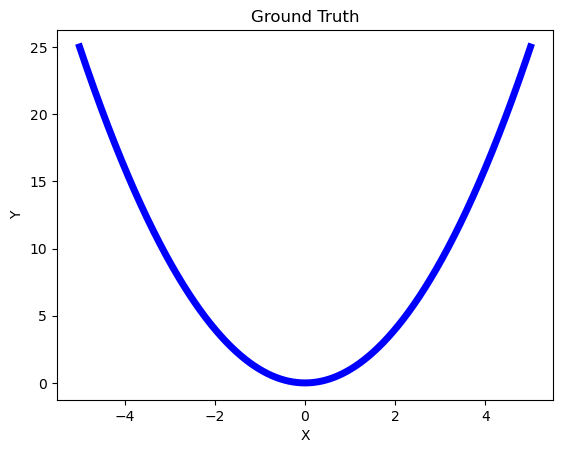

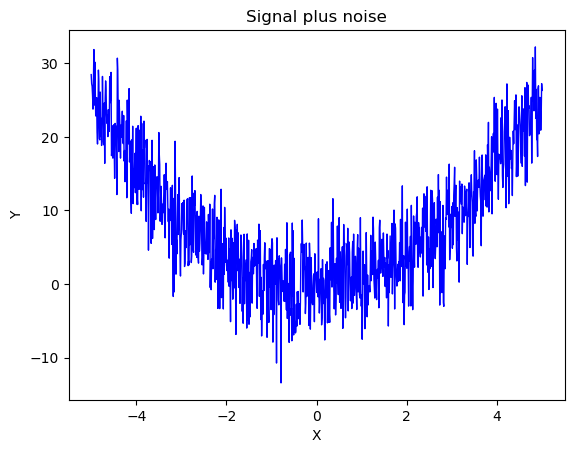

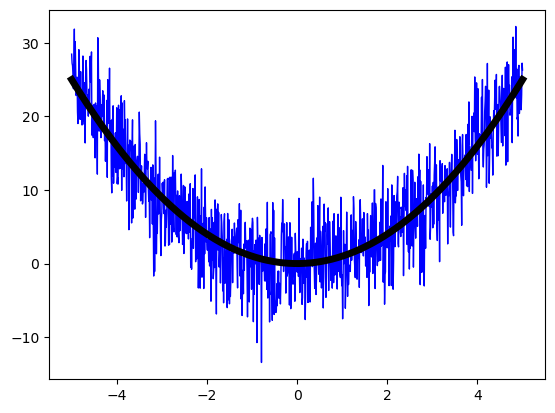

In [16]:
# Initialize parameters:
noiseMagnitude = 4 # how much random noise is there?
numData = 8 # how many measurements (samples) of the signal?
numPoints = 1001 
leftRange = -5 
rightRange = 5
x = np.linspace(leftRange,rightRange,numPoints) # determine the location 
# of evenly spaced points from -5 to 5 to use as an x-base

# Determine the functional relationship between x and y in reality (ground truth):
sig = 1 # user determines whether the signal is quadratic (1) or cubic (2)
if sig == 1:
    y1 = x**2 # quadratic function
elif sig == 2:
    y1 = x**3 # cubic function
    
# Compute signal plus noise:
y = y1 + noiseMagnitude * np.random.normal(0,1,numPoints) # signal + noise

# Plot data:
plt.figure(1)
plt.plot(x,y1,color='blue',linewidth=5)
plt.xlabel('X') 
plt.ylabel('Y')  
plt.title('Ground Truth')

plt.figure(2)
plt.plot(x,y,color='blue',linewidth=1)
plt.xlabel('X') 
plt.ylabel('Y')  
plt.title('Signal plus noise')

#Ground truth with noise in one plot
plt.figure(3)
plt.plot(x,y,color='blue',linewidth=1)
plt.plot(x,y1,color='black',linewidth=5)


(-5.0, 5.0)

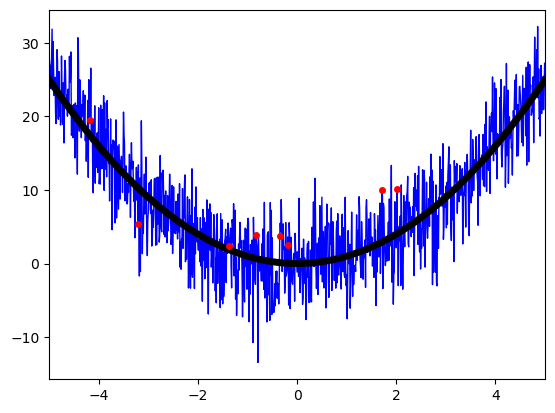

In [17]:
#%% Determine the location of the sampling (measuring) points 

# Randomly draw points to sample:
samplingIndices = np.random.randint(1,numPoints,numData) # random points, from anywhere on the signal

# Plot data as a subsample of the noisy signal:
plt.plot(x,y,color='blue',linewidth=1)
plt.plot(x,y1,color='black',linewidth=5)
plt.plot(x[samplingIndices],y[samplingIndices],'o',markersize=4,color='red')
plt.xlim(-5,5) # keep it on the same x-range as before

# Note: Parabola doesn't fit perfectly because there is noise (measurement error). We are
# overfitting to noise. The more noise, the worse this effect is
# In real life, all measurements are contaminated with noise, so overfitting
# to noise is always a concern.

/Users/umangsharma/anaconda3/envs/pytorch-m1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0.98, 'Fits for different degrees of polynomials')

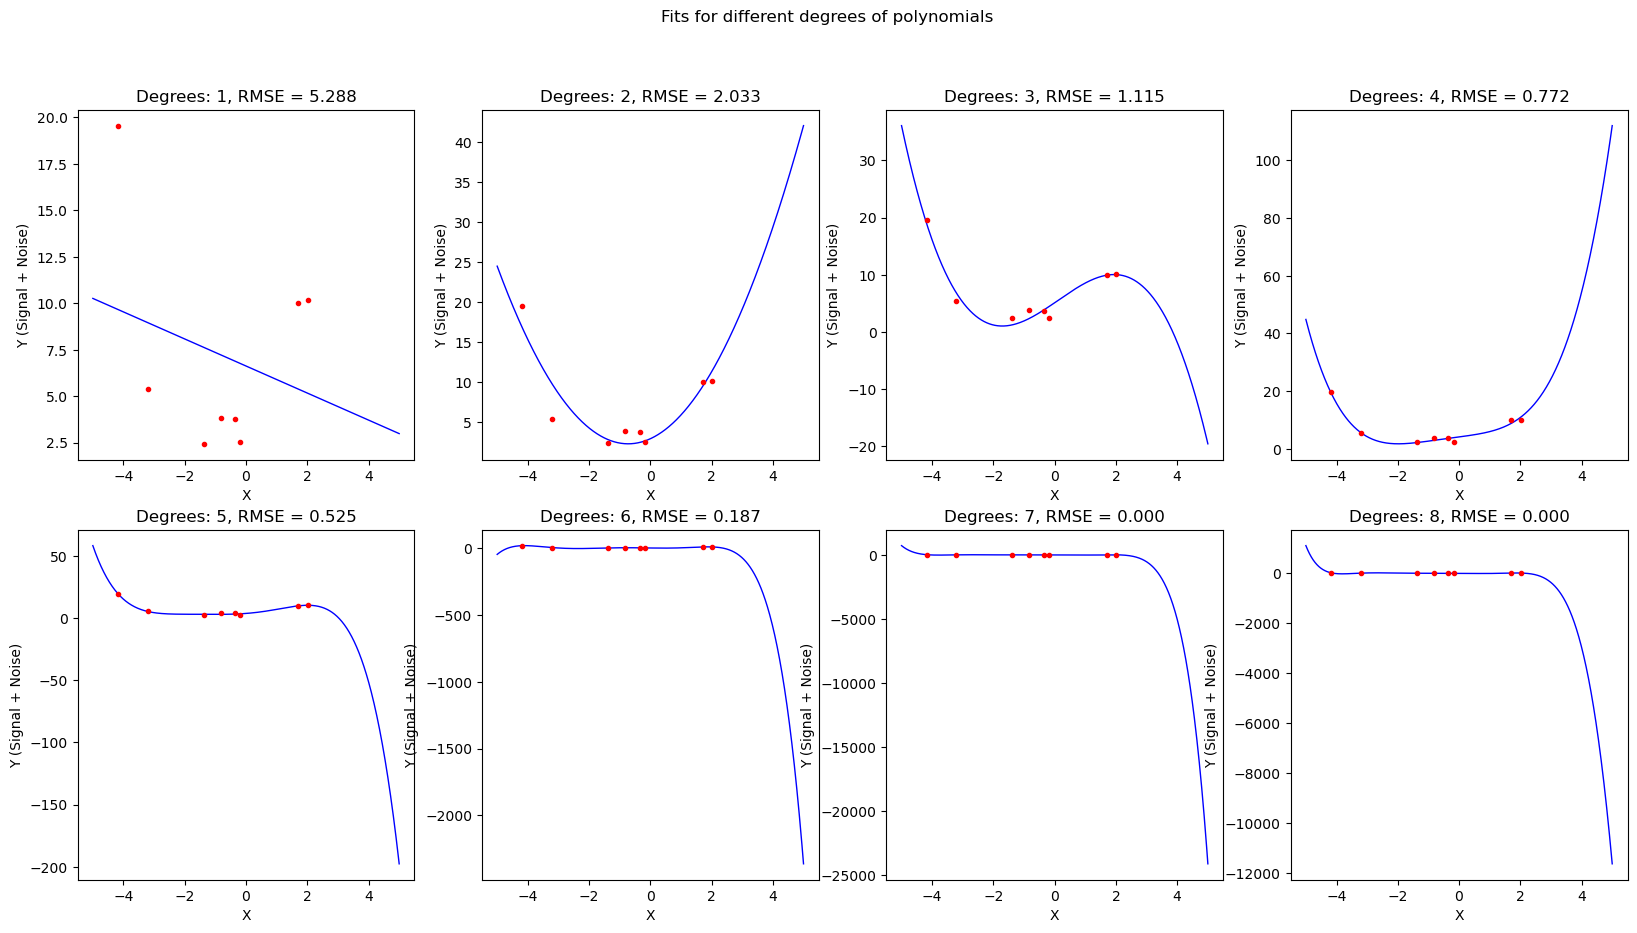

In [18]:
#%% (Over)fitting successive polynomials and calculating RMSE at each point

rmse = np.array([]) # capture RMSE for each polynomial degree
fig = plt.figure(figsize=(20,10))
for ii in range(numData): # loop through each sampling point
    ax = fig.add_subplot(2,4,ii+1)
    numDegrees = ii+1 # degree of polynomial to fit to our 8 data points
    p = np.polyfit(x[samplingIndices],y[samplingIndices],numDegrees) # returns a vector of coefficients p that minimizes the squared error
    yHat = np.polyval(p,x) # evaluate the polynomial at specific values
    ax.plot(x,yHat,color='blue',linewidth=1)
    ax.plot(x[samplingIndices],y[samplingIndices],'ro',markersize=3)
    error = np.sqrt(np.mean((y[samplingIndices] - yHat[samplingIndices])**2))
    ax.set_title('Degrees: {}'.format(numDegrees) + ', RMSE = {:.3f}'.format(error))
    rmse = np.append(rmse,error) # keep track of RMSE - we will use this later
    ax.set_xlabel('X')
    ax.set_ylabel('Y (Signal + Noise)')
    
fig.suptitle('Fits for different degrees of polynomials')



Text(0, 0.5, 'RMSE')

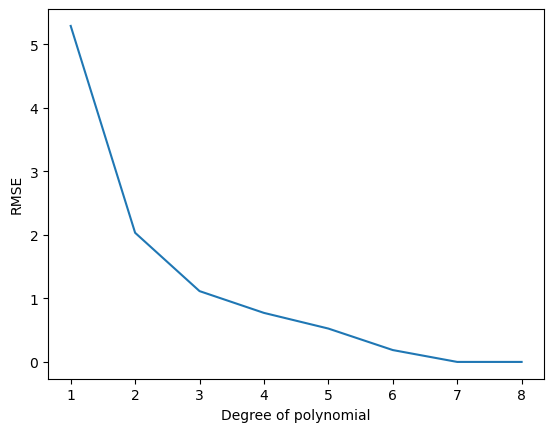

In [19]:
#%% Plotting RMSE of the training set as function of polynomial degree
plt.plot(np.linspace(1,numData,numData),rmse)
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')

## Cross-Validation

Text(0, 0.5, 'RMSE measured only at points left out from building model')

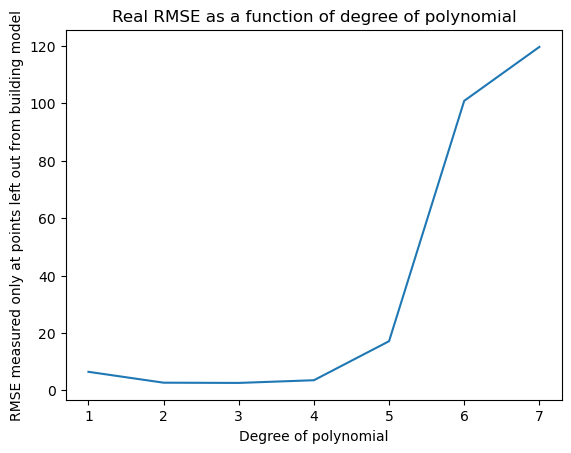

In [21]:
import warnings
warnings.filterwarnings('ignore')
#%% Leave-one-out procedure to cross-validate the number of terms in the
# model. Note: We randomly pick one of the test points to use to calculate
# the RMSE with. We use the other data points to fit the model
# This method is called "leave one out" and is very computationally
# expensive, as one has to fit the model n-1 times


# Initialize parameters:
numRepeats = 50 # Number of samples - how often are we doing this?
rmse = np.zeros([numRepeats,numData-1]) # Reinitialize RMSE (100x7)
# For each polynomial degree, 100x we are going to randomly pick one of
# the points from the set of 8 and compute the RMSE
# We are then going to fit the model from the remaining (7) points
# This is why we only go up to the 7th degree polynomial

# Compute RMSE on test set:
for ii in range(numRepeats): # Loop from 0 to 99
    testIndex = np.random.randint(0,numData,1) # Randomize test index - pick randint from 0 to 7
    testSet = samplingIndices[testIndex] # Find the test set (= 1 random data point from our 8)
    trainingSet = np.copy([samplingIndices]) # Make copy of sampling indices
    trainingSet = np.delete(trainingSet,testIndex) # Delete the test subset
    for jj in range(numData-1): # Loop from 0 to 6 - for each poly degree
        numDegrees = jj+1 # degrees are from 1 to 7, so add 1 to jj each time
        p = np.polyfit(x[trainingSet],y[trainingSet],numDegrees) # compute coefficients
        yHat = np.polyval(p,x)  # then evaluate
        # Calculate RMSE with the test set (just the single point we randomly chose above):
        rmse[ii,jj] = np.sqrt(np.mean((y[testSet] - yHat[testSet])**2)) # store this in rmse container

# Plot data:
plt.plot(np.linspace(1,numData-1,7),np.mean(rmse,axis=0))
plt.title('Real RMSE as a function of degree of polynomial')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE measured only at points left out from building model')   


In [22]:
# The solution? Where RMSE is minimal
solution = np.amin(np.mean(rmse,axis=0)) # value
index = np.argmin(np.mean(rmse,axis=0)) # index
print('The RMSE is minimal at polynomial of degree: {}'.format(index+1)) 

# Note - the console will give you warnings that the polyfit is poorly conditioned sometimes. 
# That's another dead giveaway that you are overfitting. Too many parameters, not enough data.


The RMSE is minimal at polynomial of degree: 3


## Regularization

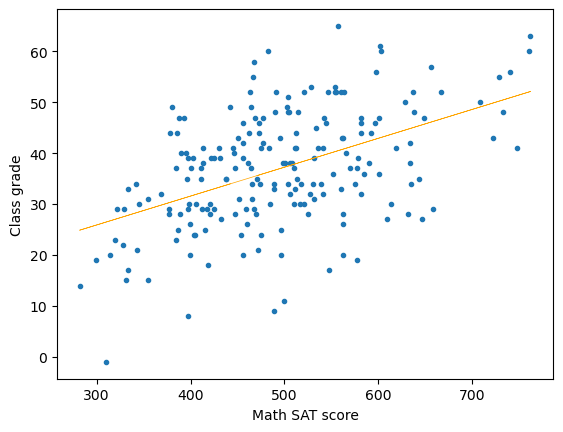

In [23]:
# Create Sata:
n = 200
satM = 500 + np.random.normal(0,1,n) * 111    

# Compute descriptives:
satMean = np.mean(satM)
satMedian = np.median(satM)
satMin = np.min(satM)
satMax = np.max(satM)

# Compute correlation coefficient:
Y = satM + 200 * np.random.normal(0,1,n)
Y = np.round(Y/10)
X = np.round(satM)
r = np.corrcoef(X,Y)

# Do that again on more sata:
x = satM/200
Y2 = np.log(x) + 0.5 * np.random.normal(0,1,n)
r2 = np.corrcoef(x,Y2)

# Reformat Y2:
Y2 = np.round(Y2*21 + 20)

# Run regression:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(satM.reshape(len(satM),1),Y2)
b0, b1 = model.intercept_, model.coef_
yHat = b1 * satM + b0

# Plot data:
import matplotlib.pyplot as plt
plt.plot(satM,Y2,'o',markersize=3)
plt.xlabel('Math SAT score')
plt.ylabel('Class grade')
plt.plot(satM,yHat,color='orange',linewidth=0.5)


1.0


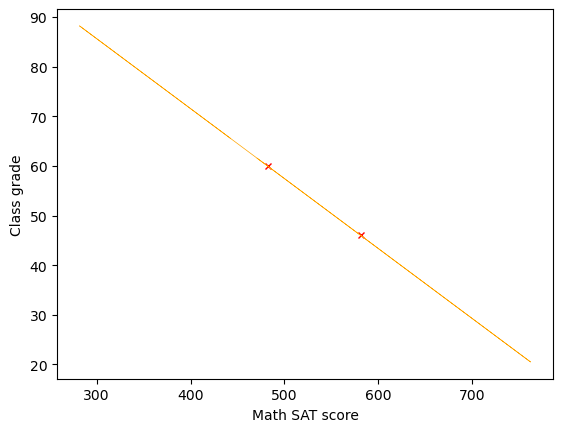

In [24]:
# Toy example to show overfitting
Q = np.array([[satM[7],Y2[7]],[satM[180],Y2[180]]]) # pick 2 points
model = LinearRegression().fit(Q[:,0].reshape(len(Q),1),Q[:,1]) # fit model
b0, b1 = model.intercept_, model.coef_ # extract betas
yHat = b1 * satM + b0 # build model
plt.plot(Q[:,0],Q[:,1],'x',color='red',markersize=5) # plot data
plt.xlabel('Math SAT score')
plt.ylabel('Class grade')
plt.plot(satM,yHat,color='orange',linewidth=0.5) # plot line
r_sq = model.score(Q[:,0].reshape(len(Q),1),Q[:,1])
print(r_sq) # Captures 100% of the variance

## Moving on to data with multiple covariates

Text(0.5, 1.0, 'R: 0.512')

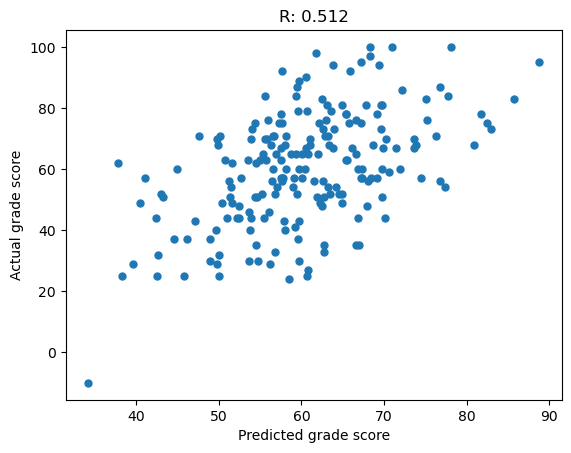

In [26]:
# Load data:
x = np.genfromtxt('mRegDataX.csv',delimiter=',') # satM satV hoursS gpa appreciation fearM fearT
y = np.genfromtxt('mRegDataY.csv',delimiter=',') # outcome: class score

# Doing the full model and calculating the yhats:
model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_
y_hat = np.dot(b1,x.transpose()) + b0

# Scatter plot between predicted and actual score of full model:
r = np.corrcoef(y_hat,y)
plt.plot(y_hat,y,'o',markersize=5)
plt.xlabel('Predicted grade score')
plt.ylabel('Actual grade score')
plt.title('R: {:.3f}'.format(r[0,1])) 




17.413964644616144 15.888096031744544


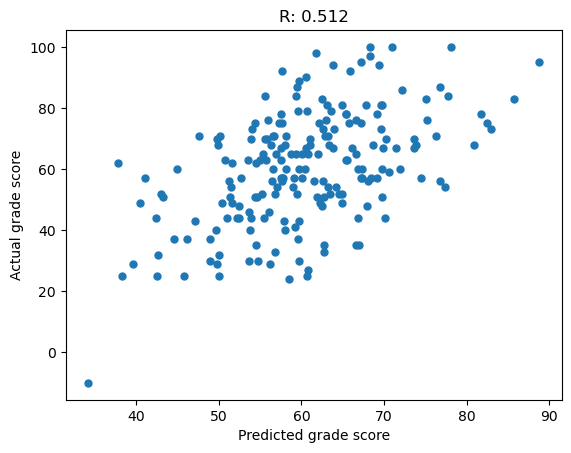

In [27]:
# Load data:
x = np.genfromtxt('mRegDataX.csv',delimiter=',') # satM satV hoursS gpa appreciation fearM fearT
y = np.genfromtxt('mRegDataY.csv',delimiter=',') # outcome: class score

# 2. Doing the full model and calculating the yhats:
model = LinearRegression().fit(x,y)
b0, b1 = model.intercept_, model.coef_
y_hat = np.dot(b1,x.transpose()) + b0

# 3. Scatter plot between predicted and actual score of full model:
r = np.corrcoef(y_hat,y)
plt.plot(y_hat,y,'o',markersize=5)
plt.xlabel('Predicted grade score')
plt.ylabel('Actual grade score')
plt.title('R: {:.3f}'.format(r[0,1])) 

# 4. Splitting the dataset for cross-validation:
x1 = np.copy(x[0:100,:])
y1 = np.copy(y[0:100])
model = LinearRegression().fit(x1,y1)
b0_1, b1_1 = model.intercept_, model.coef_

x2 = np.copy(x[100:,:])
y2 = np.copy(y[100:])
model = LinearRegression().fit(x2,y2)
b0_2, b1_2 = model.intercept_, model.coef_

# 5. Cross-validation. Using the betas from one dataset, but
# measuring the error with the other dataset
y_hat1 = np.dot(b1_2,x1.transpose()) + b0_2
y_hat2 = np.dot(b1_1,x2.transpose()) + b0_1
rmse1 = np.sqrt(np.mean((y_hat1 - y1)**2))
rmse2 = np.sqrt(np.mean((y_hat2 - y2)**2))
print(rmse1, rmse2)

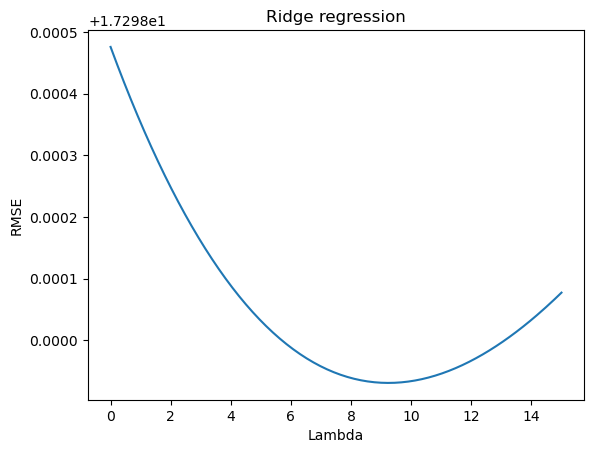

Optimal lambda: 9.225385000000001


In [28]:
# Using ridge regression to find optimal lambda: a scikit-learn implementation
# Load libraries:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Init parameters:
xTrain, xTest, yTrain, yTest = train_test_split(x, y.reshape(-1,1), test_size=0.5, random_state=0)
lambdas = np.linspace(0.001,15,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])



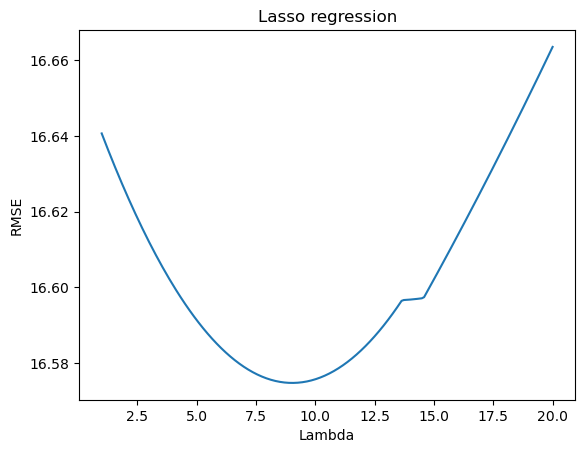

Optimal lambda: 8.98


In [29]:
#%% 5. Now do the same thing--but with lasso regression
import warnings
warnings.filterwarnings('ignore') # Just to ignore warnings that might be thrown due to artifically formed data.

# Load libraries:
from sklearn.linear_model import Lasso

# Init parameters:
xTrain, xTest, yTrain, yTest = train_test_split(x, y.reshape(-1,1), test_size=0.2, random_state=1)
lambdas = np.linspace(1,20,201)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

